# `matplotlib` 3D

Nous poursuivons notre introduction à `matplotlib` avec les visualisations en 3 dimensions. Comme pour la première partie sur les fonctions en 2 dimensions, nous allons seulement paraphraser [le tutoriel en ligne](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html), avec l'avantage toutefois que nous procurent les notebooks.

In [1]:
# la ration habituelle d'imports
import matplotlib.pyplot as plt
# et aussi numpy, même si ça n'est pas strictement nécessaire
import numpy as np

Pour pouvoir faire des visualisations en 3D, il vous faut importer ceci :

In [2]:
# même si l'on n'utilise pas explicitement
# d'attributs du module Axes3D
# cet import est nécessaire pour faire
# des visualisations en 3D
from mpl_toolkits.mplot3d import Axes3D

Dans ce notebook nous allons utiliser un mode de visualisation un peu plus élaboré, mieux intégré à l'environnement des notebooks :

In [3]:
# ce mode d'interaction va nous permettre de nous déplacer
# dans l'espace pour voir les courbes en 3D
# depuis plusieurs points de vue
%matplotlib notebook

Comme on va le voir très vite, avec ces réglages vous aurez la possibilité d'explorer interactivement les visualisations en 3D.

### Un premier exemple : une courbe

Commençons par le premier exemple du tutorial, qui nous montre comment dessiner une ligne suivant une courbe définie de manière paramétrique (ici, $x$ et $y$ sont fonctions de $z$). Les points importants sont :

* la composition d'un plot (plusieurs figures, chacune composée de plusieurs *subplots*), reste bien entendu valide ; j'ai enrichi l'exemple initial pour mélanger un *subplot* en 3D avec un *subplot* en 2D ;
* l'utilisation du paramètre `projection='3d'` lorsqu'on crée un *subplot* qui va se prêter à une visualisation en 3D ;
* l'objet *subplot* ainsi créé est une instance de la classe `Axes3DSubplot` ;
* on peut envoyer à cet objet :
  * la méthode `plot` qu'on avait déjà vue pour la dimension 2 (c'est ce que l'on fait dans ce premier exemple) ;
  * des méthodes spécifiques à la 3D, que l'on voit dans les exemples suivants.

<IPython.core.display.Javascript object>


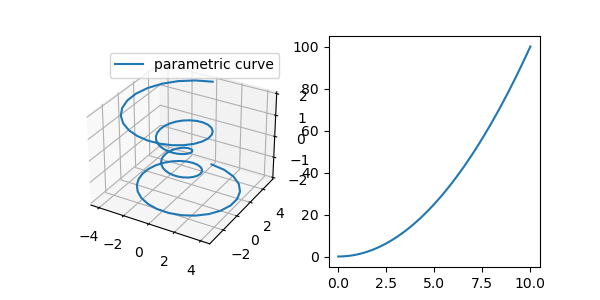

In [4]:
# je choisis une taille raisonnable compte tenu de l'espace
# disponible dans fun-mooc
fig = plt.figure(figsize=(6, 3))

# voici la façon de créer un *subplot*
# qui se prête à une visualisation en 3D
ax = fig.add_subplot(121, projection='3d')

# à présent, copié de
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots
# on crée une courbe paramétrique
# où x et y sont fonctions de z
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
# on fait maitenant un appel à plot normal
# mais avec un troisième paramètre
ax.plot(x, y, z, label='parametric curve')
ax.legend()

# on peut tout à fait ajouter un plot usuel
# dans un subplot, comme on l'a vu pour la 2D
ax2 = fig.add_subplot(122)
x = np.linspace(0, 10)
y = x**2
ax2.plot(x, y)
plt.show()

Un autre point à remarquer est qu'avec le mode d'interaction que nous avons choisi :

```python
%matplotlib notebook
```

vous bénéficiez d'un mode d'interaction plus riche avec la figure. Par exemple, vous pouvez cliquer dans la figure en 3D, et vous déplacer pour changer de point de vue ; par exemple si vous sélectionnez l'outil `Pan/Zoom` (l'outil avec 4 flèches), vous pouvez arriver à voir ceci :

![rotated](media/rotated-3d.png)

Les différents boutons d'outil [sont décrits plus en détail ici](https://matplotlib.org/users/navigation_toolbar.html). Je dois avouer ne pas arriver à tout utiliser lorsque la visualisation est faite dans un notebook, mais la possibilité de modifier le point de vue peut s'avérer intéressante pour explorer les données.

*****

En explorant les autres exemples du tutorial, vous pouvez commencer à découvrir l'éventail des possibilités offertes par `matplotlib`.

### `Axes3DSubplot.scatter`

Comme en dimension 2, `scatter` permet de montrer un nuage de points.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots>

`scatter3d_demo.py`

In [5]:
'''
==============
3D scatterplot
==============

Demonstration of a basic scatterplot in 3D.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


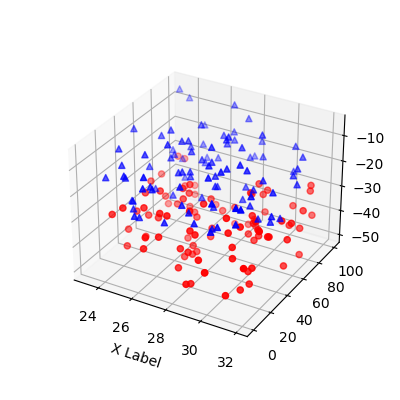

In [6]:
fig = plt.figure(figsize=(4, 4))

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
plt.show()

### `Axes3DSubplot.plot_wireframe`

Utilisez cette méthode pour dessiner en mode "fil de fer".

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#wireframe-plots>.

`wire3d_demo.py`

In [7]:
from mpl_toolkits.mplot3d import axes3d

<IPython.core.display.Javascript object>


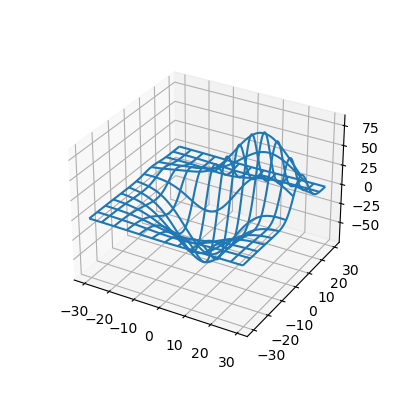

In [8]:
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

### `Axes3DSubplot.plot_surface`

Comme on s'en doute, `plot_surface` sert à dessiner des surfaces dans l'espace ; ces exemples montrent surtout comment utiliser des couleurs ou des *patterns*.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots>.

`surface3d_demo.py`

In [9]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

<IPython.core.display.Javascript object>


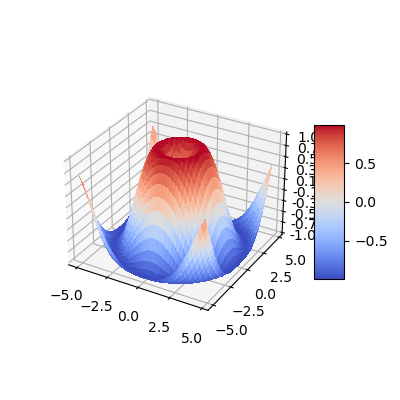

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/1516736908.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [10]:
fig = plt.figure(figsize=(4, 4))

ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

`surface3d_demo2.py`

In [11]:
'''
========================
3D surface (solid color)
========================

Demonstrates a very basic plot of a 3D surface using a solid color.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


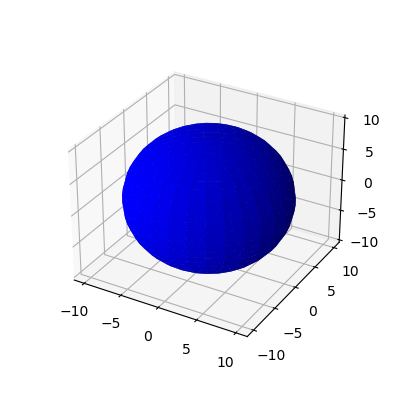

In [12]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, color='b')

plt.show()

`surface3d_demo3.py`

In [13]:
'''
=========================
3D surface (checkerboard)
=========================

Demonstrates plotting a 3D surface colored in a checkerboard pattern.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

<IPython.core.display.Javascript object>


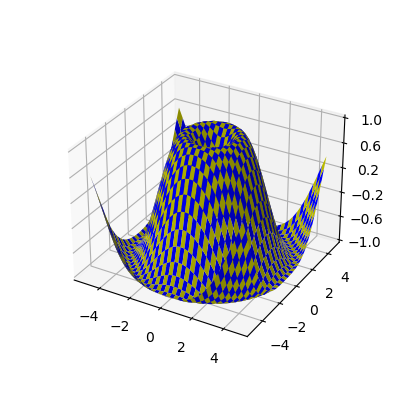

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/344937523.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [14]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, facecolors=colors, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()

### `Axes3DSubplot.plot_trisurf`

`plot_trisurf` se prête aussi au rendu de surfaces, mais sur la base de maillages en triangles.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#tri-surface-plots>.

`trisurf3d_demo.py`

In [15]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


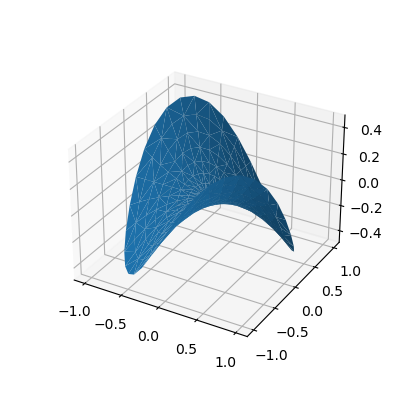

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/3875410136.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/3875410136.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [16]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')

n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

`trisurf3d_demo2.py`

In [17]:
'''
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a Triangulation object's mask and passes the object directly
to plot_trisurf.
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

<IPython.core.display.Javascript object>


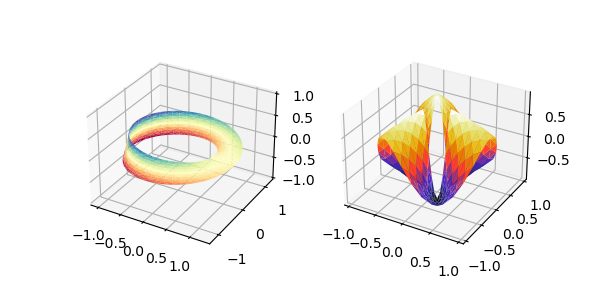

In [18]:
fig = plt.figure(figsize=(6, 3))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)

plt.show()

### `Axes3DSubplot.contour`

Pour dessiner des contours.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#contour-plots>.

`contour3d_demo.py`

In [19]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


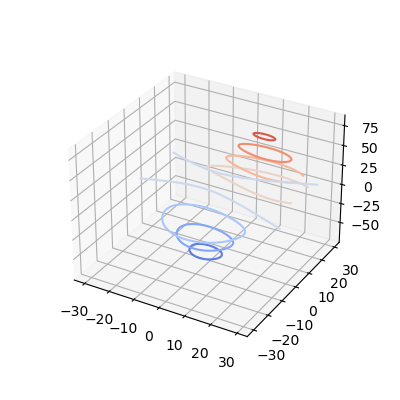

In [20]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

`contour3d_demo2.py`

In [21]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


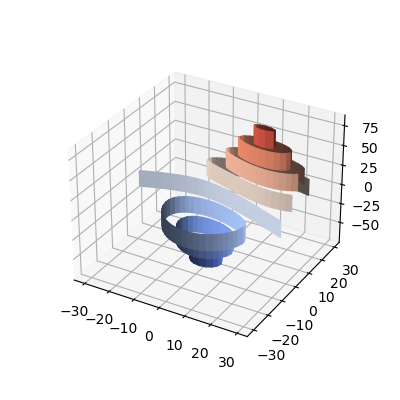

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/4009273385.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [22]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

`contour3d_demo3.py`

In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


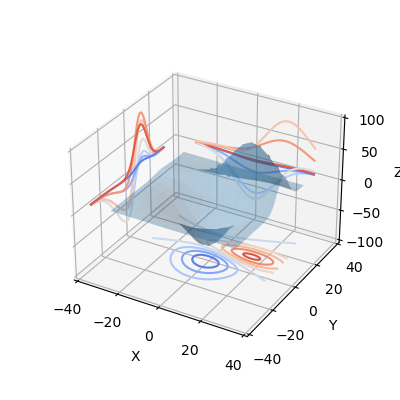

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/2354238407.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [24]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

### `Axes3DSubplot.contourf`

Comme `Axes3DSubplot.contour`, mais avec un rendu plein plutôt que sous forme de lignes (le `f` provient de l'anglais *filled*).

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#filled-contour-plots>.

`contourf3d_demo.py`

In [25]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


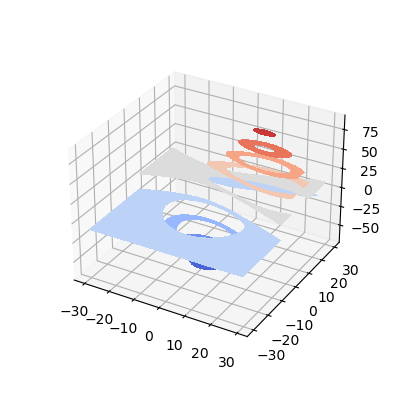

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/3599762257.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [26]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

`contourf3d_demo2.py`

In [27]:
"""
.. versionadded:: 1.1.0
   This demo depends on new features added to contourf3d.
"""

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

<IPython.core.display.Javascript object>


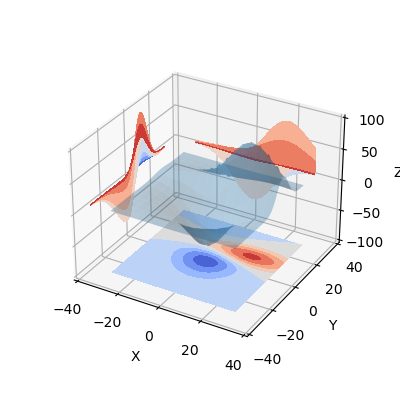

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/4207722875.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [28]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

### `Axes3DSubplot.add_collection3d`

Pour afficher des polygones.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#polygon-plots>.

In [29]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

<IPython.core.display.Javascript object>


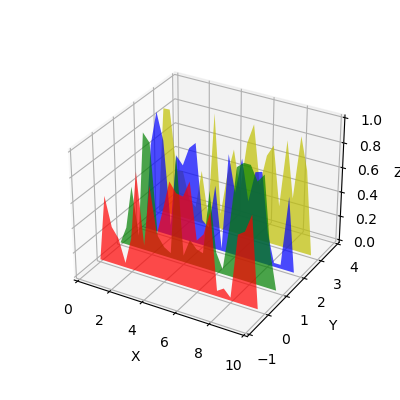

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/2019453543.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [30]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

### `Axes3DSubplot.bar`

Pour construire des diagrammes à barres.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#bar-plots>.

`bars3d_demo.py`

In [31]:
"""
========================================
Create 2D bar graphs in different planes
========================================

Demonstrates making a 3D plot which has 2D bar graphs projected onto
planes y=0, y=1, etc.
"""

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


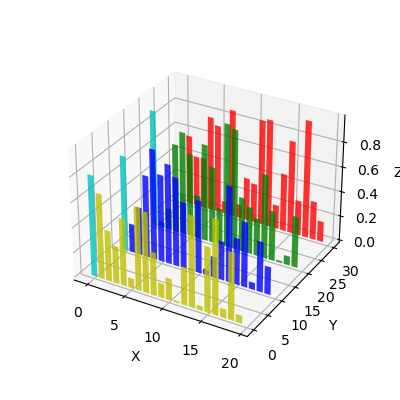

In [32]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

### `Axes3DSubplot.quiver`

Pour afficher des champs de vecteurs sous forme de traits.

Tutoriel original : <https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#quiver>.

`quiver3d_demo.py`

In [33]:
'''
==============
3D quiver plot
==============

Demonstrates plotting directional arrows at points on a 3d meshgrid.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


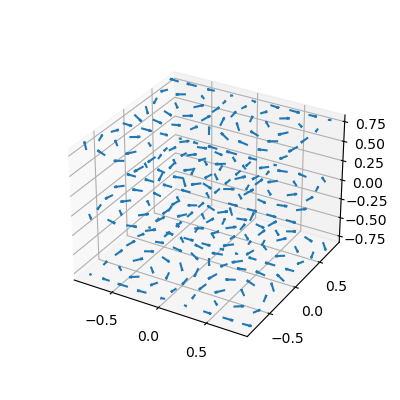

C:\Users\HIPPOL~1\AppData\Local\Temp/ipykernel_968/423389743.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [34]:
fig = plt.figure(figsize=(4, 4))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()